In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from adodbapi.process_connect_string import process

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical


In [3]:
wine_data = datasets.load_wine()

In [4]:
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [5]:
data = pd.DataFrame(data = wine_data['data'], columns = wine_data['feature_names'])
data['target'] = wine_data['target']
data.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0,2
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0,2
129,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0,1
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2


In [6]:
data.shape

(178, 14)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [8]:
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [9]:
data['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

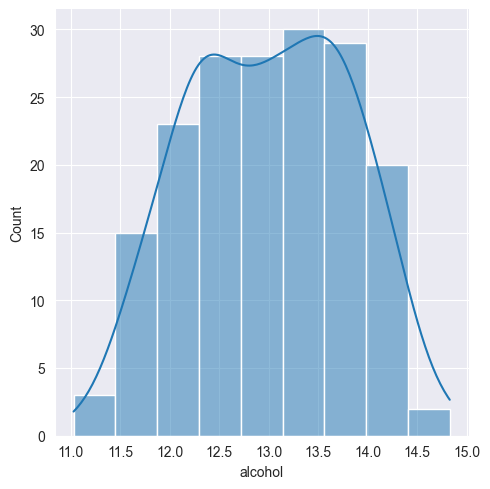

In [11]:
sns.displot(data['alcohol'], kde=1)

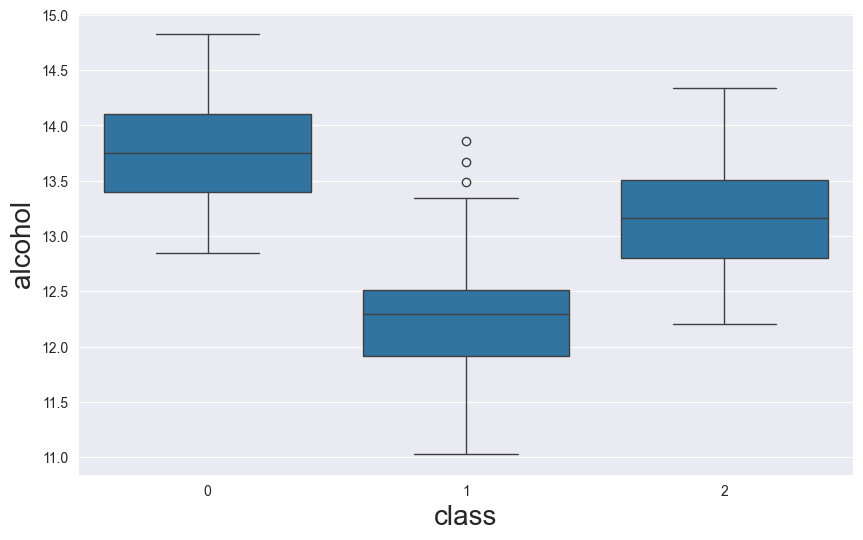

In [15]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=data['target'], y=data['alcohol'])

plt.xlabel('class', fontsize=20)
plt.ylabel('alcohol', fontsize=20)

plt.show()

In [16]:
features = data.drop('target', axis = 1)
target = data['target']

In [17]:
features.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [18]:
target.sample(5)

48     0
66     1
146    2
26     0
1      0
Name: target, dtype: int64

In [19]:
target = to_categorical(target, 3)
target

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [20]:
standardScaler = StandardScaler()

processed_features = pd.DataFrame(standardScaler.fit_transform(features), columns = features.columns, index = features.index)
processed_features.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,7.943708e-15,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
malic_acid,178.0,3.592632e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
ash,178.0,-4.066660e-15,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
alcalinity_of_ash,178.0,-7.983626e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
magnesium,178.0,-7.983626e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
total_phenols,178.0,-3.991813e-17,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
flavanoids,178.0,9.979533e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
nonflavanoid_phenols,178.0,-5.588538e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
proanthocyanins,178.0,-1.656602e-15,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
color_intensity,178.0,-3.442939e-16,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(processed_features, target, test_size=0.2, random_state=1)

In [22]:
x_train.shape, y_train.shape

((142, 13), (142, 3))

In [23]:
x_test.shape, y_test.shape

((36, 13), (36, 3))

In [24]:
class WineClassificationModel(Model):
    
    def __init__(self, input_shape):
        
        super(WineClassificationModel, self).__init__()
        
        self.d1 = layers.Dense(128, activation='relu', input_shape=[input_shape])
        self.d2 = layers.Dense(64, activation='relu')
        
        self.d3 = layers.Dense(3, activation='softmax')
        
    def call(self, x):
        
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        
        return x

In [31]:
model = WineClassificationModel(x_train.shape[1])

model.compile(optimizer=keras.optimizers.SGD(learning_rate = 0.001), loss=keras.losses.CategoricalCrossentropy, metrics=['accuracy'])

C:\Users\haral\source\Repos\Getting-Started-with-Tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
num_epochs = 500

In [33]:
training_history = model.fit(x_train.values, y_train, validation_split = 0.2, epochs=num_epochs, batch_size=48)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.2122 - loss: 1.2911 - val_accuracy: 0.1034 - val_loss: 1.2366
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2166 - loss: 1.3139 - val_accuracy: 0.1034 - val_loss: 1.2312
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2341 - loss: 1.2797 - val_accuracy: 0.1379 - val_loss: 1.2260
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2367 - loss: 1.2756 - val_accuracy: 0.1379 - val_loss: 1.2208
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2236 - loss: 1.2785 - val_accuracy: 0.1379 - val_loss: 1.2156
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2630 - loss: 1.2566 - val_accuracy: 0.1379 - val_loss: 1.2102
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2656 - loss: 1.2612 - val_accuracy: 0.1724 - val_loss: 1.2053
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2726 - loss: 1.2568 - val_accuracy: 0.1724 - val_loss:

In [35]:
training_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

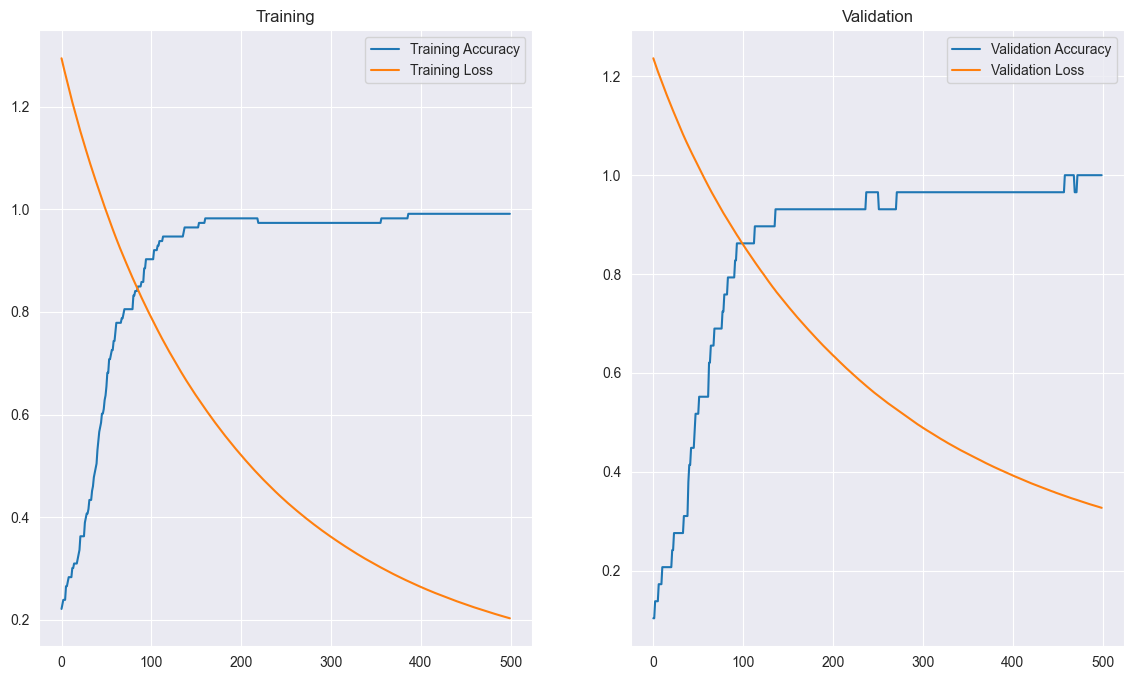

In [36]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['val_accuracy']
recall = training_history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Training')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Validation Accuracy')
plt.plot(epochs_range, recall, label='Validation Loss')

plt.title('Validation')
plt.legend()

plt.show()


In [37]:
score = model.evaluate(x_test, y_test)
score_df = pd.Series(score, index=model.metrics_names)

score_df

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9711 - loss: 0.2452


loss               0.239229
compile_metrics    0.972222
dtype: float64

In [38]:
y_pred = model.predict(x_test)
y_pred[:10]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.15886682, 0.1872661 , 0.65386707],
       [0.0462119 , 0.9141257 , 0.03966245],
       [0.84812236, 0.0861728 , 0.06570482],
       [0.18572176, 0.7886397 , 0.02563853],
       [0.93765545, 0.02446994, 0.03787461],
       [0.0917527 , 0.23053631, 0.67771095],
       [0.18371493, 0.57537425, 0.24091081],
       [0.9921858 , 0.00360139, 0.00421284],
       [0.08106522, 0.11189207, 0.8070427 ],
       [0.10148417, 0.6753555 , 0.22316036]], dtype=float32)

In [39]:
y_pred = np.where(y_pred >= 0.5, 1, y_pred)
y_pred = np.where(y_pred < 0.5, 0, y_pred)

In [40]:
y_pred[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [41]:
y_test[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [42]:
accuracy_score(y_test, y_pred)

0.9444444444444444